# importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

# importing the dataset

In [2]:
dataset=pd.read_csv('FuelConsumption.csv')
dataset

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


# Data Visualization

In [3]:
dataset.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


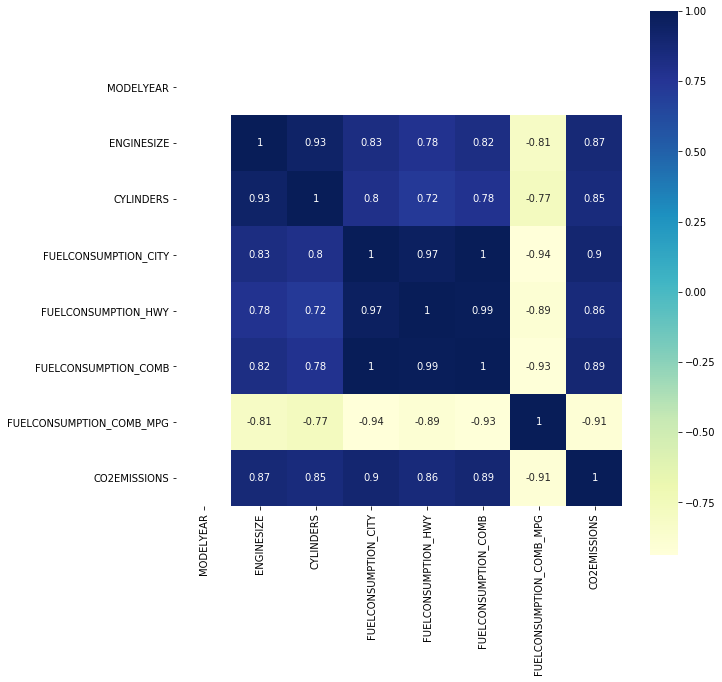

In [4]:
corr = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=1,square=True,annot=True,cmap='YlGnBu')

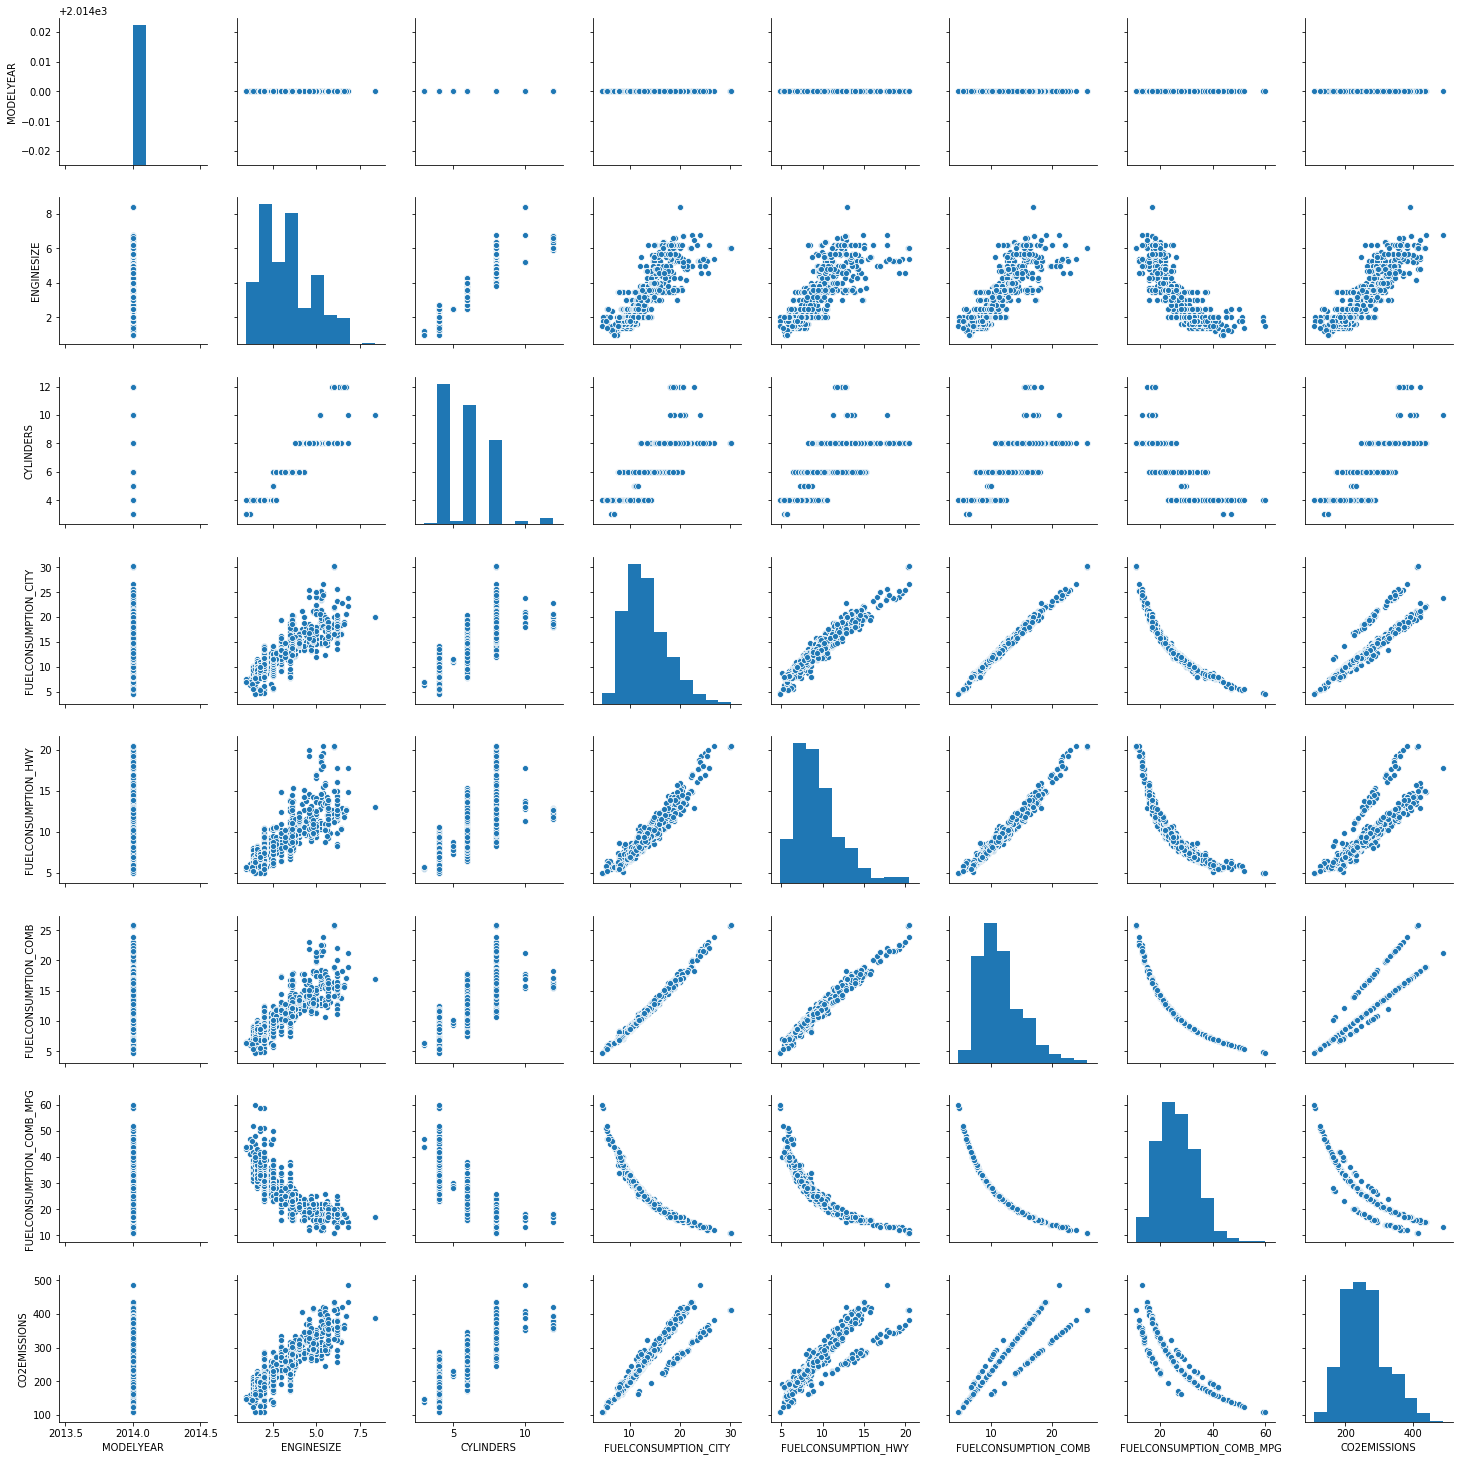

In [5]:
sns.pairplot(dataset)

Text(0, 0.5, 'C02 Emissions')

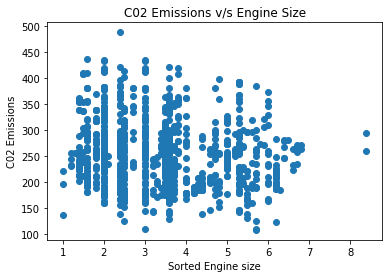

In [6]:
plt.scatter(sorted(dataset['ENGINESIZE']), dataset['CO2EMISSIONS'])
plt.title('C02 Emissions v/s Engine Size')
plt.xlabel('Sorted Engine size')
plt.ylabel('C02 Emissions')

Text(0, 0.5, 'C02 Emissions')

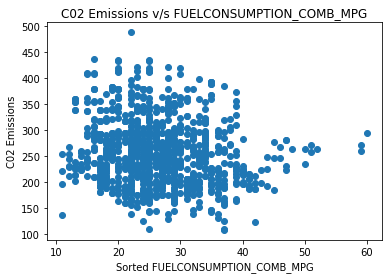

In [7]:
plt.scatter(sorted(dataset['FUELCONSUMPTION_COMB_MPG']), dataset['CO2EMISSIONS'])
plt.title('C02 Emissions v/s FUELCONSUMPTION_COMB_MPG')
plt.xlabel('Sorted FUELCONSUMPTION_COMB_MPG')
plt.ylabel('C02 Emissions')

Text(0, 0.5, 'C02 Emissions')

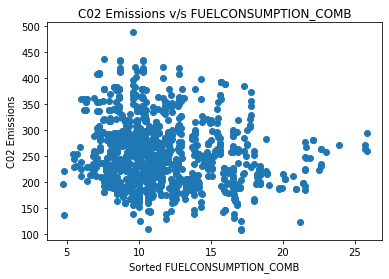

In [8]:
plt.scatter(sorted(dataset['FUELCONSUMPTION_COMB']), dataset['CO2EMISSIONS'])
plt.title('C02 Emissions v/s FUELCONSUMPTION_COMB')
plt.xlabel('Sorted FUELCONSUMPTION_COMB')
plt.ylabel('C02 Emissions')

Text(0, 0.5, 'C02 Emissions')

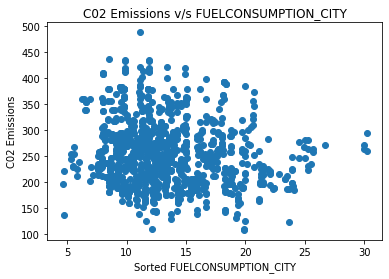

In [9]:
plt.scatter(sorted(dataset['FUELCONSUMPTION_CITY']), dataset['CO2EMISSIONS'])
plt.title('C02 Emissions v/s FUELCONSUMPTION_CITY')
plt.xlabel('Sorted FUELCONSUMPTION_CITY')
plt.ylabel('C02 Emissions')

Text(0, 0.5, 'C02 Emissions')

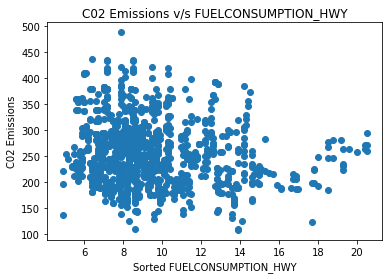

In [10]:
plt.scatter(sorted(dataset['FUELCONSUMPTION_HWY']), dataset['CO2EMISSIONS'])
plt.title('C02 Emissions v/s FUELCONSUMPTION_HWY')
plt.xlabel('Sorted FUELCONSUMPTION_HWY')
plt.ylabel('C02 Emissions')

Text(0, 0.5, 'C02 Emissions')

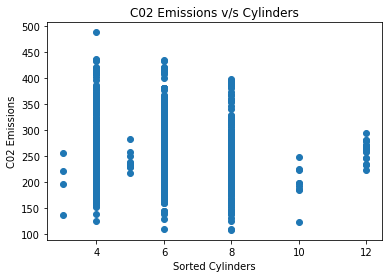

In [11]:
plt.scatter(sorted(dataset['CYLINDERS']), dataset['CO2EMISSIONS'])
plt.title('C02 Emissions v/s Cylinders')
plt.xlabel('Sorted Cylinders')
plt.ylabel('C02 Emissions')

In [12]:
dataset.FUELTYPE.unique()

array(['Z', 'D', 'X', 'E'], dtype=object)

In [13]:
dataset.VEHICLECLASS.unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'MINICOMPACT', 'SUBCOMPACT',
       'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

Text(0.5, 1.0, 'C02 Emissions v/s Vehicle Class')

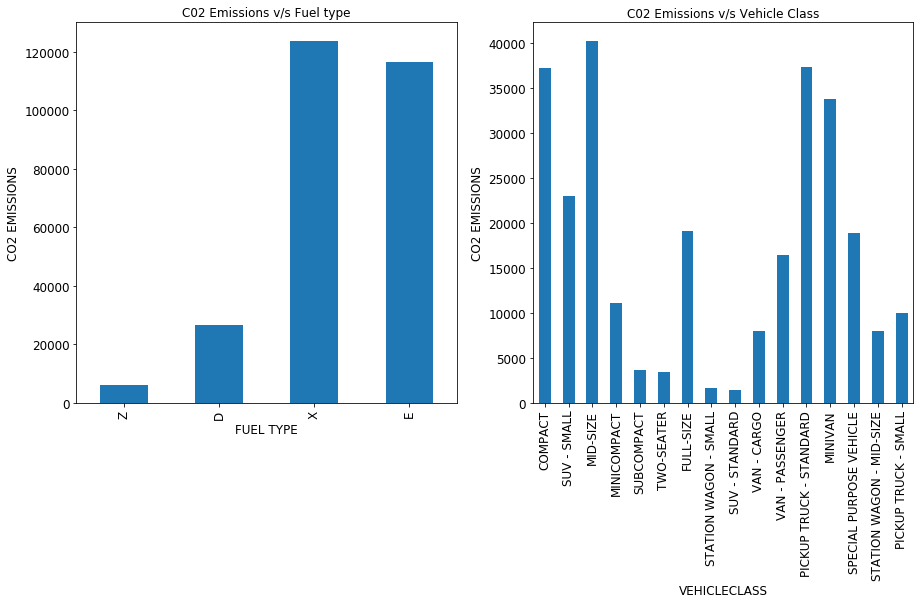

In [14]:
f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

ax1 = dataset[['FUELTYPE','CO2EMISSIONS']].groupby(['FUELTYPE']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="", 
                                         stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("FUEL TYPE", fontsize=12)
ax1.set_ylabel("CO2 EMISSIONS", fontsize=12)
ax1.set_xticklabels(['Z', 'D', 'X', 'E'])
ax1.set_title('C02 Emissions v/s Fuel type')

 
ax2 = dataset[['VEHICLECLASS','CO2EMISSIONS']].groupby(['VEHICLECLASS']).sum().reset_index().plot(kind='bar',  
      legend = False, stacked=True, title ="", fontsize=12, ax=ax2)

ax2.set_xlabel("VEHICLECLASS", fontsize=12)
ax2.set_ylabel("CO2 EMISSIONS", fontsize=12)
ax2.set_xticklabels(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'MINICOMPACT', 'SUBCOMPACT',
       'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'])
ax2.set_title('C02 Emissions v/s Vehicle Class')

In [15]:
dataset.MAKE.unique()

array(['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT', 'FORD',
       'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA',
       'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [16]:
dataset.TRANSMISSION.unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'A6', 'AM7', 'AV8', 'AS8', 'A7', 'A8',
       'M7', 'A4', 'M5', 'AV', 'A5', 'AM6', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5'], dtype=object)

Text(0.5, 1.0, 'C02 Emissions v/s Transmission')

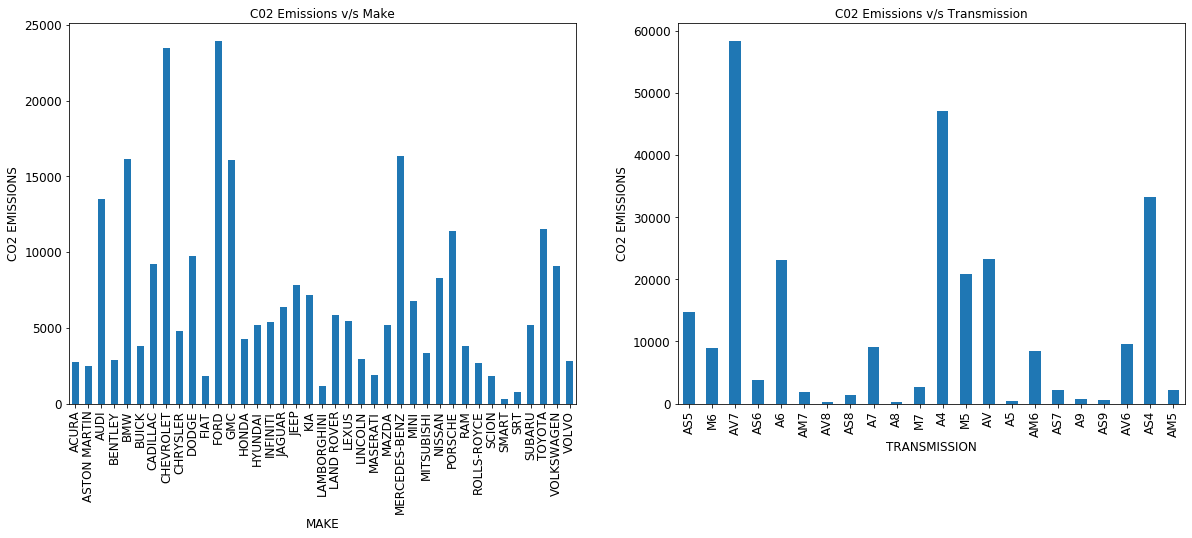

In [17]:
f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

ax1 = dataset[['MAKE','CO2EMISSIONS']].groupby(['MAKE']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="", 
                                         stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("MAKE", fontsize=12)
ax1.set_ylabel("CO2 EMISSIONS", fontsize=12)
ax1.set_xticklabels(['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT', 'FORD',
       'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA',
       'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'])
ax1.set_title('C02 Emissions v/s Make')

 
ax2 = dataset[['TRANSMISSION','CO2EMISSIONS']].groupby(['TRANSMISSION']).sum().reset_index().plot(kind='bar',  
      legend = False, stacked=True, title ="", fontsize=12, ax=ax2)

ax2.set_xlabel("TRANSMISSION", fontsize=12)
ax2.set_ylabel("CO2 EMISSIONS", fontsize=12)
ax2.set_xticklabels(['AS5', 'M6', 'AV7', 'AS6', 'A6', 'AM7', 'AV8', 'AS8', 'A7', 'A8',
       'M7', 'A4', 'M5', 'AV', 'A5', 'AM6', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5'])
ax2.set_title('C02 Emissions v/s Transmission')

# Data Preprocessing

In [18]:
dataset.drop(['MODELYEAR','MODEL','ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB'], axis=1,inplace=True)
dataset

,MAKE,VEHICLECLASS,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ACURA,COMPACT,4,AS5,Z,33,196
1,ACURA,COMPACT,4,M6,Z,29,221
2,ACURA,COMPACT,4,AV7,Z,48,136
3,ACURA,SUV - SMALL,6,AS6,Z,25,255
4,ACURA,SUV - SMALL,6,AS6,Z,27,244
...,...,...,...,...,...,...,...
1062,VOLVO,SUV - SMALL,6,AS6,X,24,271
1063,VOLVO,SUV - SMALL,6,AS6,X,25,264
1064,VOLVO,SUV - SMALL,6,AS6,X,24,271
1065,VOLVO,SUV - SMALL,6,AS6,X,25,260


In [19]:
dataset.isnull().any()

MAKE                        False
VEHICLECLASS                False
CYLINDERS                   False
TRANSMISSION                False
FUELTYPE                    False
FUELCONSUMPTION_COMB_MPG    False
CO2EMISSIONS                False
dtype: bool

In [20]:
x=dataset.iloc[:,:6].values
x

array([['ACURA', 'COMPACT', 4, 'AS5', 'Z', 33],
       ['ACURA', 'COMPACT', 4, 'M6', 'Z', 29],
       ['ACURA', 'COMPACT', 4, 'AV7', 'Z', 48],
       ...,
       ['VOLVO', 'SUV - SMALL', 6, 'AS6', 'X', 24],
       ['VOLVO', 'SUV - SMALL', 6, 'AS6', 'X', 25],
       ['VOLVO', 'SUV - STANDARD', 6, 'AS6', 'X', 22]], dtype=object)

In [21]:
y=dataset.iloc[:,6:].values
y

array([[196],
       [221],
       [136],
       ...,
       [271],
       [260],
       [294]], dtype=int64)

In [22]:
lb=LabelEncoder()
x[:,0]=lb.fit_transform(x[:,0]) 
x

array([[0, 'COMPACT', 4, 'AS5', 'Z', 33],
       [0, 'COMPACT', 4, 'M6', 'Z', 29],
       [0, 'COMPACT', 4, 'AV7', 'Z', 48],
       ...,
       [38, 'SUV - SMALL', 6, 'AS6', 'X', 24],
       [38, 'SUV - SMALL', 6, 'AS6', 'X', 25],
       [38, 'SUV - STANDARD', 6, 'AS6', 'X', 22]], dtype=object)

In [23]:
x[:,1]=lb.fit_transform(x[:,1]) 
x

array([[0, 0, 4, 'AS5', 'Z', 33],
       [0, 0, 4, 'M6', 'Z', 29],
       [0, 0, 4, 'AV7', 'Z', 48],
       ...,
       [38, 11, 6, 'AS6', 'X', 24],
       [38, 11, 6, 'AS6', 'X', 25],
       [38, 12, 6, 'AS6', 'X', 22]], dtype=object)

In [24]:
x[:,3]=lb.fit_transform(x[:,3]) 
x

array([[0, 0, 4, 10, 'Z', 33],
       [0, 0, 4, 20, 'Z', 29],
       [0, 0, 4, 17, 'Z', 48],
       ...,
       [38, 11, 6, 11, 'X', 24],
       [38, 11, 6, 11, 'X', 25],
       [38, 12, 6, 11, 'X', 22]], dtype=object)

In [25]:
x[:,4]=lb.fit_transform(x[:,4]) 
x

array([[0, 0, 4, 10, 3, 33],
       [0, 0, 4, 20, 3, 29],
       [0, 0, 4, 17, 3, 48],
       ...,
       [38, 11, 6, 11, 2, 24],
       [38, 11, 6, 11, 2, 25],
       [38, 12, 6, 11, 2, 22]], dtype=object)

In [26]:
x.shape

(1067, 6)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
x_train

array([[7, 12, 6, 2, 2, 22],
       [36, 6, 8, 11, 2, 19],
       [25, 10, 6, 12, 3, 27],
       ...,
       [28, 13, 6, 20, 3, 24],
       [16, 1, 8, 13, 3, 21],
       [22, 2, 6, 11, 2, 25]], dtype=object)

In [29]:
y_train

array([[290],
       [347],
       [244],
       [218],
       [170],
       [267],
       [389],
       [138],
       [218],
       [198],
       [280],
       [196],
       [237],
       [255],
       [242],
       [168],
       [218],
       [246],
       [250],
       [186],
       [172],
       [315],
       [239],
       [413],
       [214],
       [260],
       [246],
       [246],
       [264],
       [264],
       [163],
       [317],
       [254],
       [292],
       [380],
       [299],
       [230],
       [186],
       [216],
       [232],
       [244],
       [202],
       [271],
       [170],
       [225],
       [162],
       [301],
       [225],
       [264],
       [214],
       [346],
       [212],
       [191],
       [244],
       [242],
       [196],
       [207],
       [212],
       [288],
       [382],
       [294],
       [267],
       [235],
       [235],
       [322],
       [196],
       [230],
       [259],
       [159],
       [224],
       [216],
      

In [30]:
Rf=RandomForestRegressor(n_estimators=10,random_state=0,n_jobs=-1,max_depth=4)
Rf.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [31]:
import pickle
pickle.dump(Rf,open('random.pkl','wb'))

In [32]:
y_pred=Rf.predict(x_test)
y_pred

array([358.42719928, 204.82483867, 227.14876827, 204.82483867,
       176.15650815, 291.98211948, 204.82483867, 277.32743345,
       199.33514275, 358.42719928, 303.79995387, 363.53246244,
       214.63150286, 286.67938655, 176.15650815, 255.90977589,
       387.14977404, 227.14876827, 251.90476513, 358.42719928,
       197.67792911, 197.67792911, 234.81429882, 234.81429882,
       140.02980963, 277.32743345, 277.23023517, 334.77436744,
       251.90476513, 140.02980963, 358.42719928, 234.81429882,
       235.54296467, 234.81429882, 197.67792911, 199.33514275,
       291.98211948, 227.14876827, 234.81429882, 234.81429882,
       178.63693561, 178.63693561, 199.33514275, 176.15650815,
       291.98211948, 199.33514275, 255.90977589, 178.63693561,
       352.03356796, 358.42719928, 366.4523908 , 270.97124174,
       299.90080858, 140.02980963, 227.14876827, 178.63693561,
       286.67938655, 176.15650815, 255.90977589, 204.82483867,
       204.82483867, 199.33514275, 227.14876827, 334.77

In [33]:
y_test

array([[356],
       [209],
       [230],
       [212],
       [168],
       [292],
       [212],
       [276],
       [202],
       [334],
       [313],
       [437],
       [224],
       [281],
       [177],
       [260],
       [414],
       [223],
       [251],
       [359],
       [191],
       [189],
       [244],
       [242],
       [131],
       [283],
       [274],
       [294],
       [246],
       [110],
       [359],
       [239],
       [229],
       [237],
       [191],
       [196],
       [294],
       [221],
       [237],
       [237],
       [184],
       [184],
       [202],
       [194],
       [297],
       [198],
       [260],
       [179],
       [344],
       [359],
       [338],
       [288],
       [290],
       [129],
       [230],
       [179],
       [283],
       [159],
       [258],
       [209],
       [207],
       [205],
       [225],
       [294],
       [262],
       [299],
       [354],
       [230],
       [207],
       [124],
       [304],
      

In [34]:
r2_score(y_test,y_pred)

0.9631966265075673

In [35]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

155.36490677950462

In [36]:
from math import sqrt
rms=sqrt(mse)
rms

12.464545991712038